In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import joblib as jb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier

In [15]:
#Loading the data
train_df = pd.read_excel("C:/Users/fatma/Downloads/archive/water_potability.xlsx")
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.942046,215.673786,56488.672413,3.231438,129.000000,541.915468,9.313771,70.828374,4.354288,1
1,5.324942,280.089655,35344.658047,13.043806,180.206746,392.421496,10.504820,55.084668,4.427138,1
2,8.848586,188.919983,32033.332019,13.127000,182.397370,479.791975,12.070444,77.671337,4.014682,1
3,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
4,4.788861,234.893703,28174.620516,10.850036,187.424131,444.854321,11.784799,89.010974,2.896852,1


In [17]:
#Exploratory Data Analysis
train_df.shape #(Rows,Columns)


(3276, 10)

In [19]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [21]:
train_df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#Data Visualization


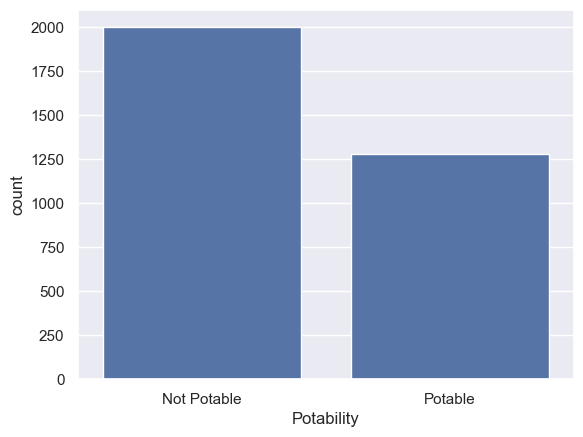

In [81]:
ax = sns.countplot(x = "Potability",data= train_df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

<Axes: xlabel='Potability', ylabel='ph'>

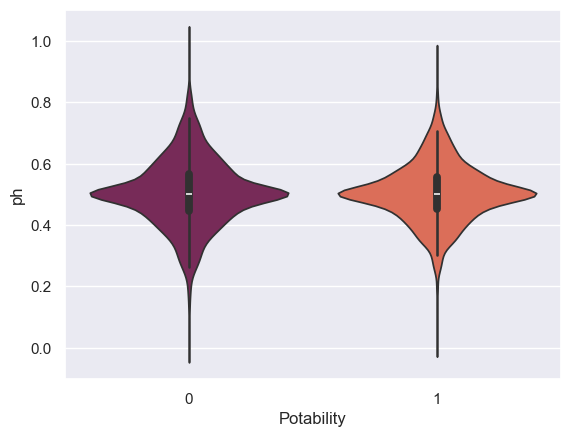

In [83]:
sns.violinplot(x='Potability', y='ph', data=train_df, palette='rocket')


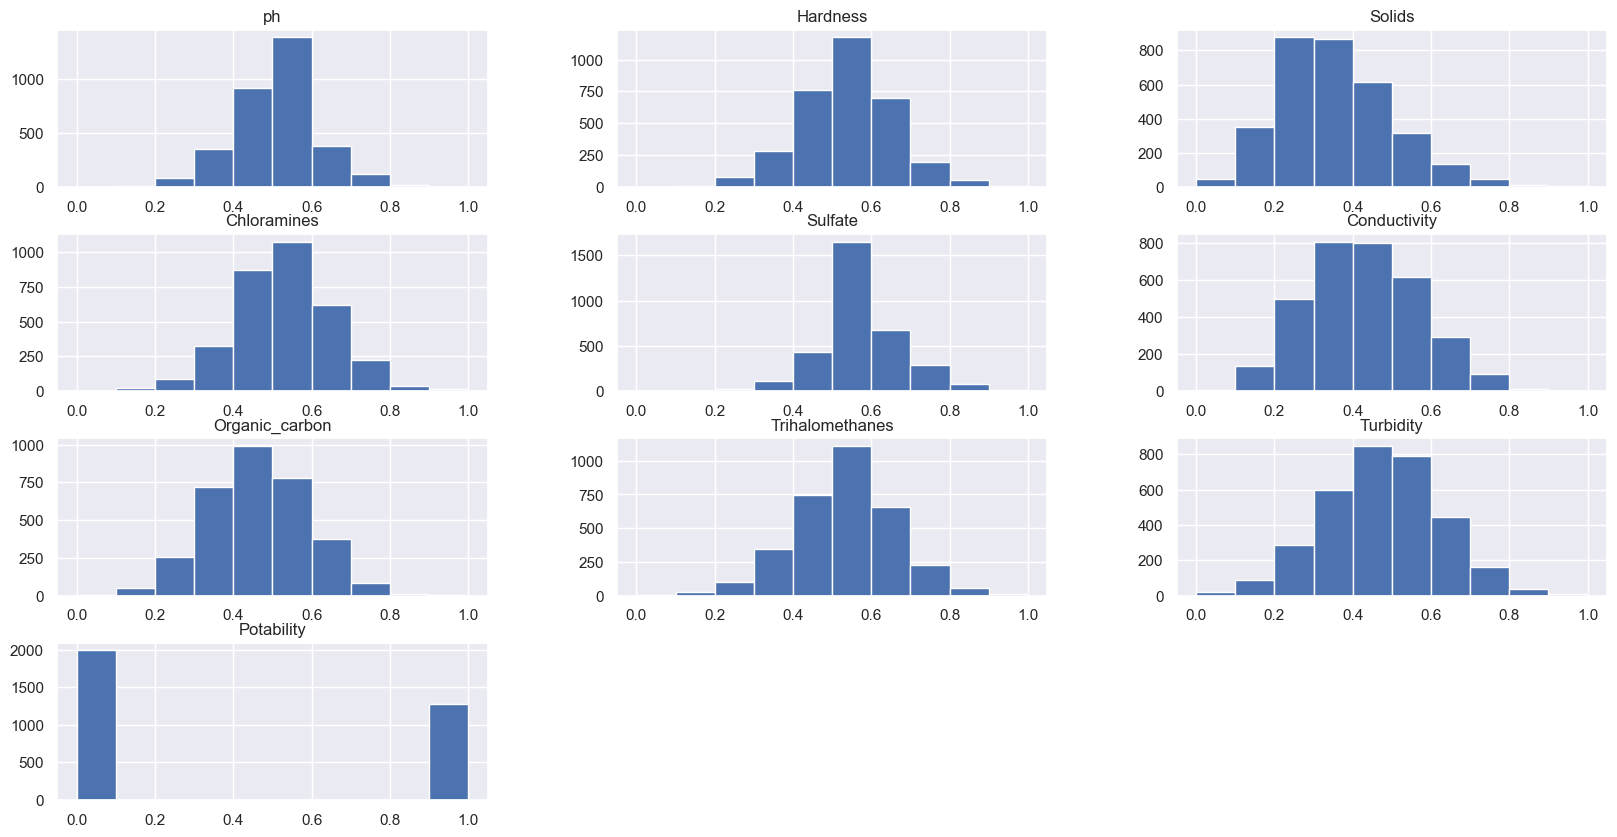

In [87]:
plt.rcParams['figure.figsize'] = [20,10]
train_df.hist()
plt.show()


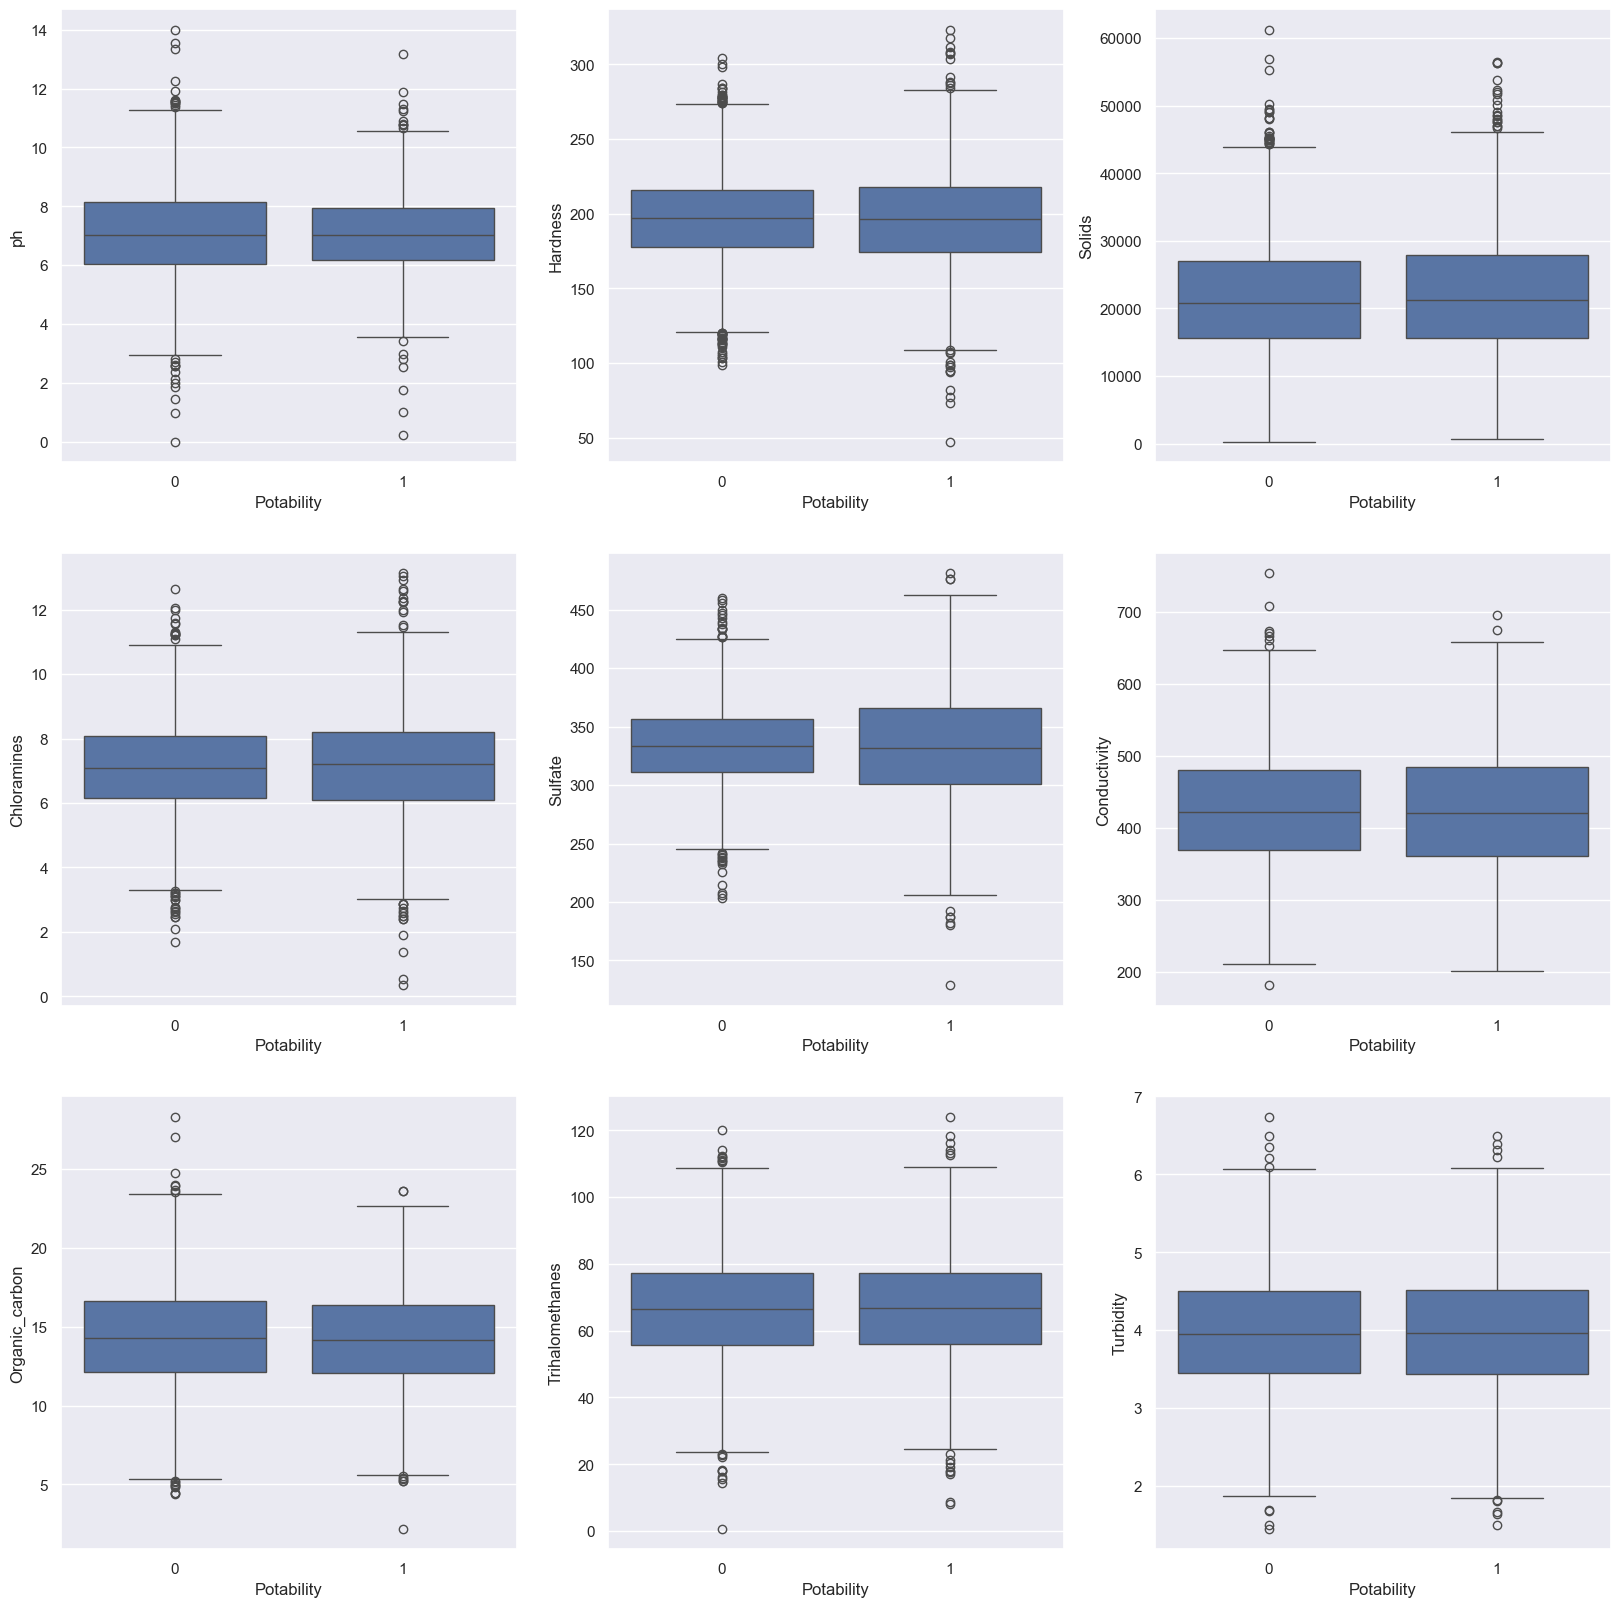

In [25]:
#Now we will try to find the relationship of numerical attributes with potability
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.boxplot(x=train_df.Potability, y=train_df[attributes[k]], ax=axes[i,j])
        k=k+1

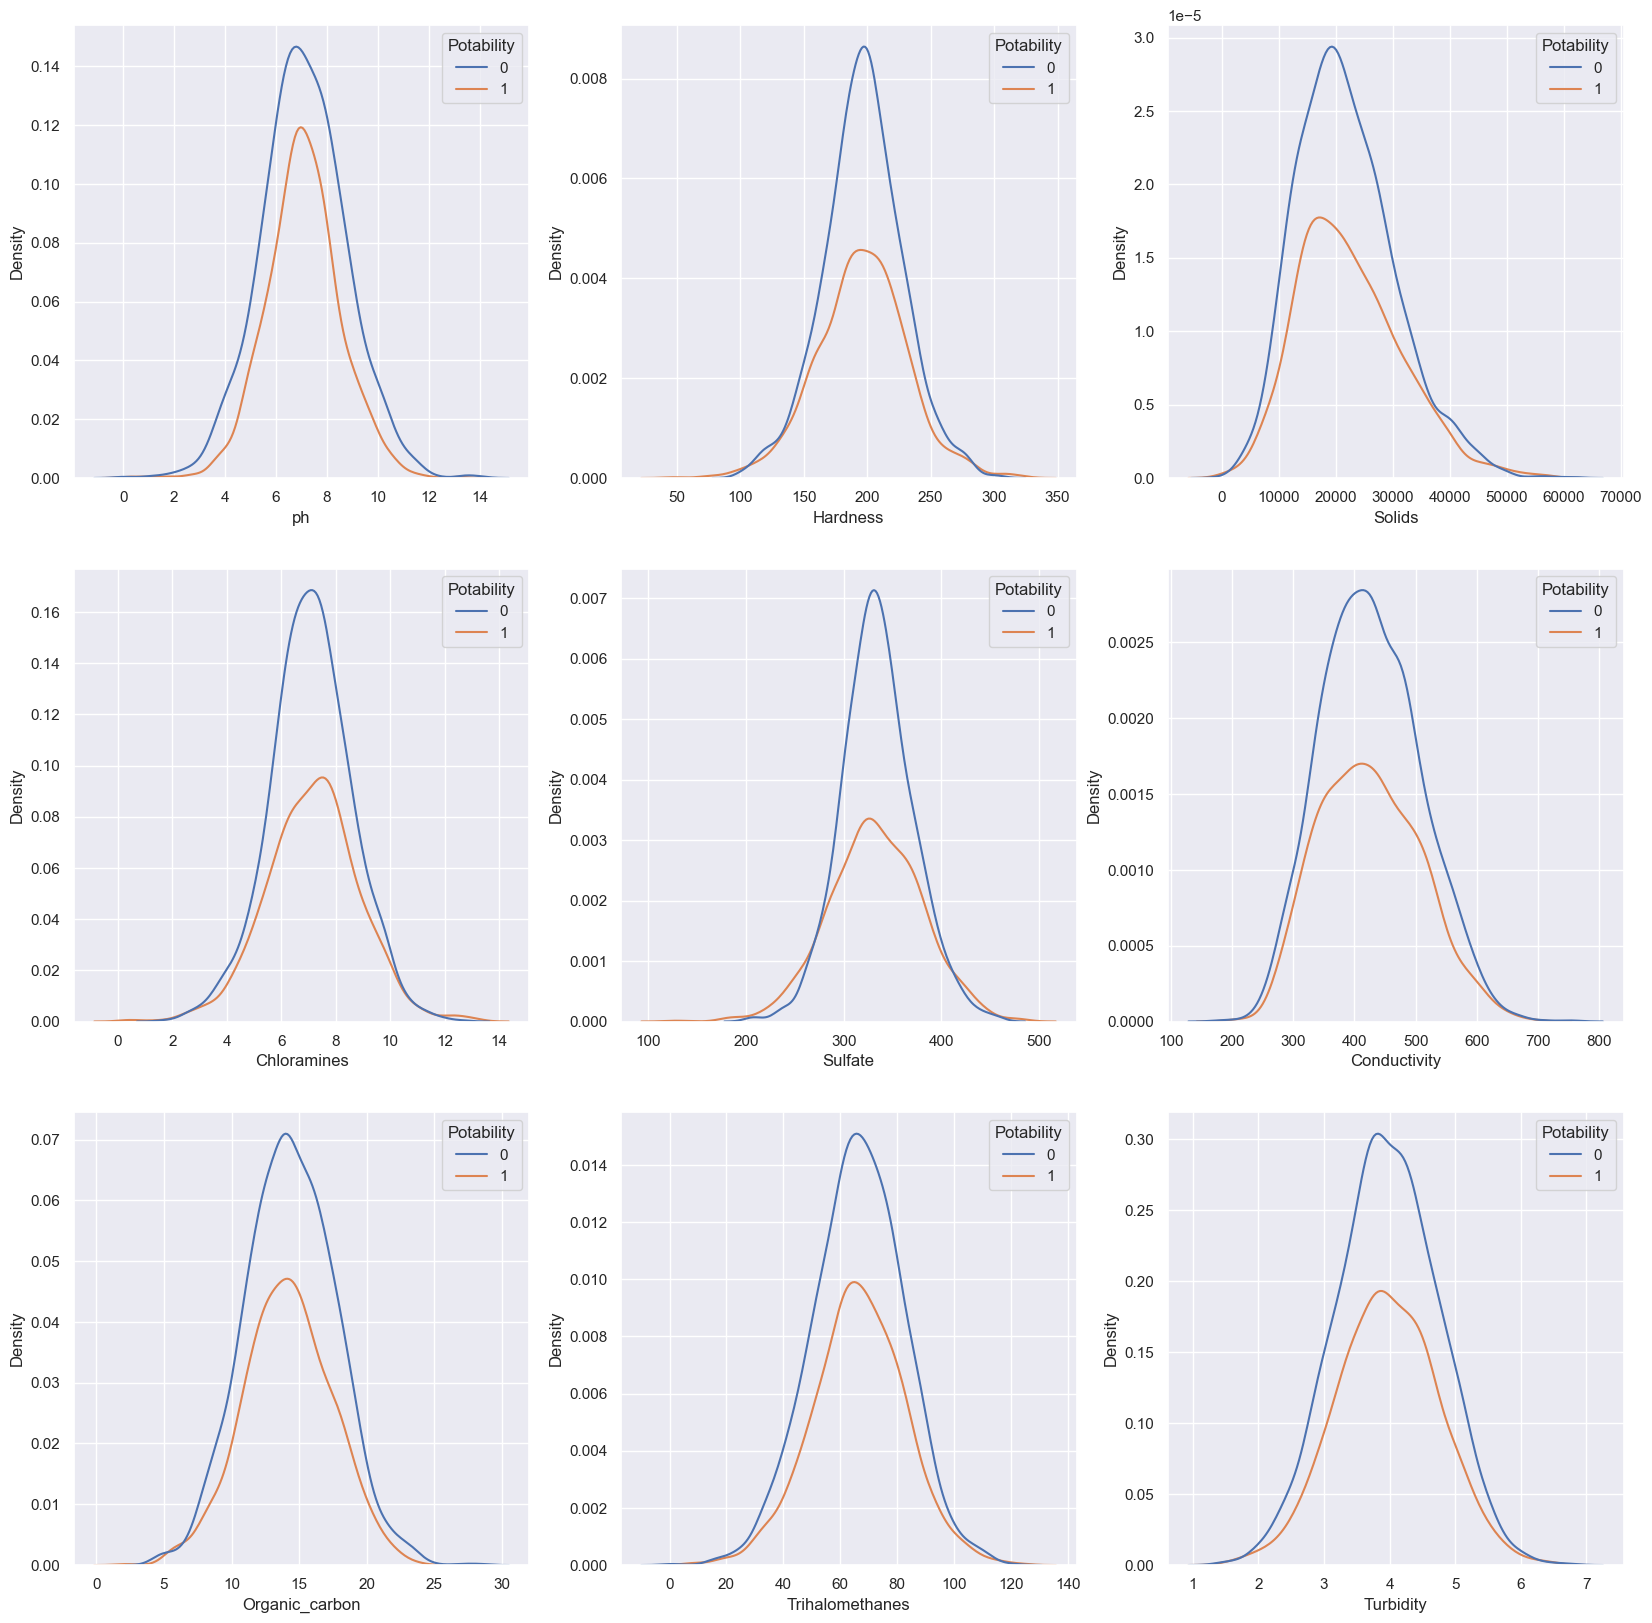

In [27]:
#Now we will try to find the relationship of numerical attributes with potability
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(20, 20))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.kdeplot(hue=train_df.Potability, x=train_df[attributes[k]], ax=axes[i,j])
        k=k+1

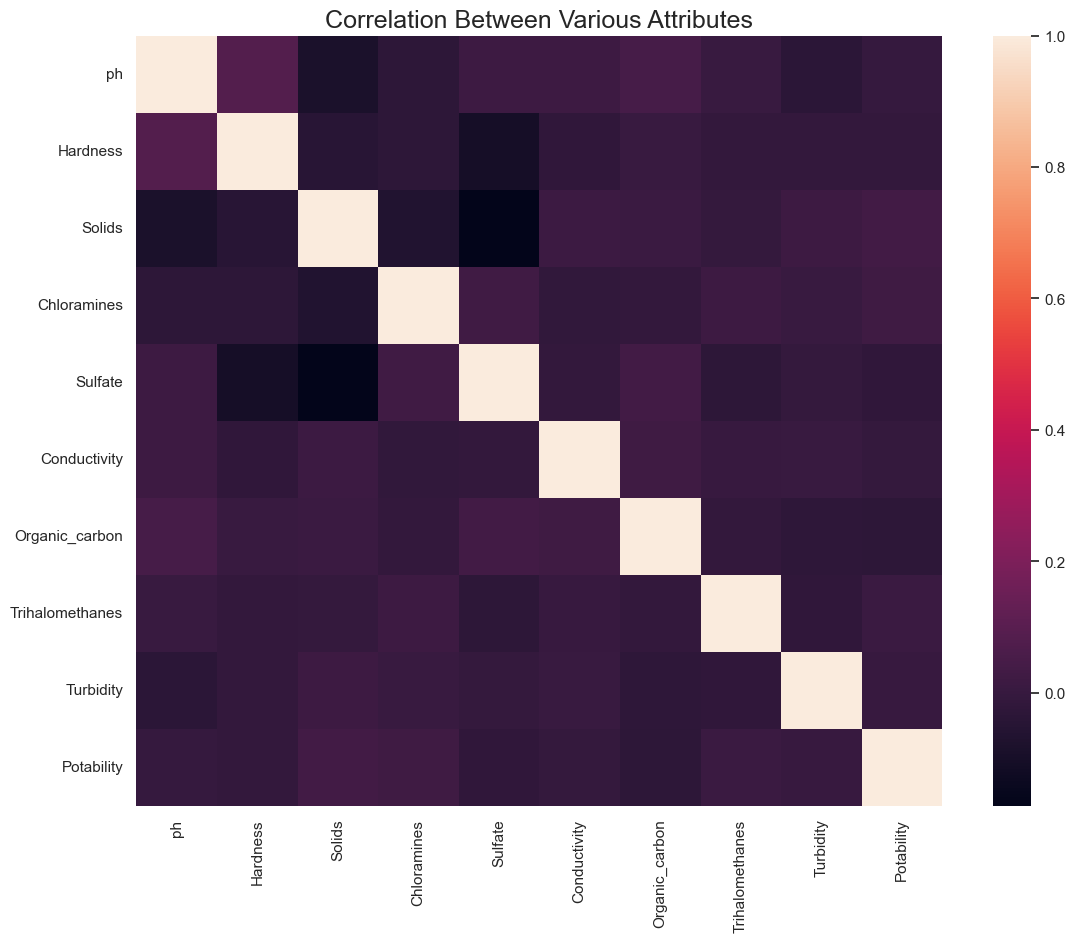

In [29]:
plt.figure(figsize=(13,10))
sns.heatmap(train_df.corr())
plt.title('Correlation Between Various Attributes', fontsize=18);

In [ ]:
#Missing Values


In [31]:
train_df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [33]:
cond=train_df['Potability']==0

train_df['ph'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['ph'].median(),
                                False:train_df.loc[train_df['Potability']==1]['ph'].median()
                                }),inplace=True)

train_df['Sulfate'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Sulfate'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

train_df['Trihalomethanes'].fillna(cond.map({True:train_df.loc[train_df['Potability']==0]['Trihalomethanes'].median(),
                                False:train_df.loc[train_df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [35]:
train_df.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [37]:
train_df.to_excel('water_potability_preprocessed.xlsx', index=False)


In [ ]:
#Scaling


In [39]:
train_df.describe().T[['min','max']].T


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,47.432,320.942611,0.352,129.000000,181.483754,2.2,0.738,1.450,0.0
max,14.0,323.124,61227.196008,13.127,481.030642,753.342620,28.3,124.000,6.739,1.0


In [76]:
#Modeling

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import warnings


In [43]:
input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [45]:
scaler = MinMaxScaler()
scaler.fit(train_df[input_cols])
train_df[input_cols] = scaler.transform(train_df[input_cols])
train_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.638718,0.610253,0.922200,0.225396,0.000000,0.630281,0.272558,0.568629,0.549118,1
1,0.380353,0.843904,0.575043,0.993488,0.145461,0.368863,0.318192,0.440904,0.562892,1
2,0.632042,0.513210,0.520675,1.000000,0.151684,0.521647,0.378178,0.624145,0.484909,1
3,0.485723,0.705773,0.637413,0.716219,0.165243,0.340946,0.353734,0.592553,0.454706,1
4,0.342062,0.679968,0.457320,0.821764,0.165963,0.460552,0.367234,0.716141,0.273559,1


In [65]:
X=train_df.drop('Potability',axis=1)
y=train_df['Potability']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [69]:
clf=DecisionTreeClassifier(random_state=41,max_depth=6,min_samples_split=0.03)
clf.fit(X_train, y_train)
Y_pred=clf.predict(X_test)
pred=clf.predict(X_train)
print("Accuracy of training data :",accuracy_score( y_train.values,pred))
print("Accuracy of validation data :",accuracy_score(y_test.values,Y_pred))

Accuracy of training data : 0.7944647944647945
Accuracy of validation data : 0.7411477411477412


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
y = LabelEncoder().fit_transform(train_df['Potability'])
X = train_df.drop('Potability', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)

print(f'Accuracy (Train Set SVM): {accuracy_train * 100:.2f}%')
print(f'Accuracy (Test Set SVM): {accuracy_test * 100:.2f}%')

Accuracy (Train Set SVM): 73.55%
Accuracy (Test Set SVM): 65.40%


In [ ]:
#Confusion Matrix

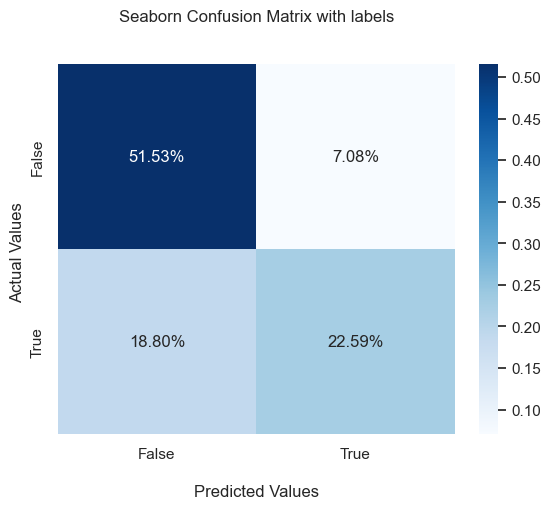

In [53]:
cf_matrix=confusion_matrix(y_test,Y_pred)
labels=['True Negative','False Positive','False Negative','True Positive']
labels=np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
#Feature Importance


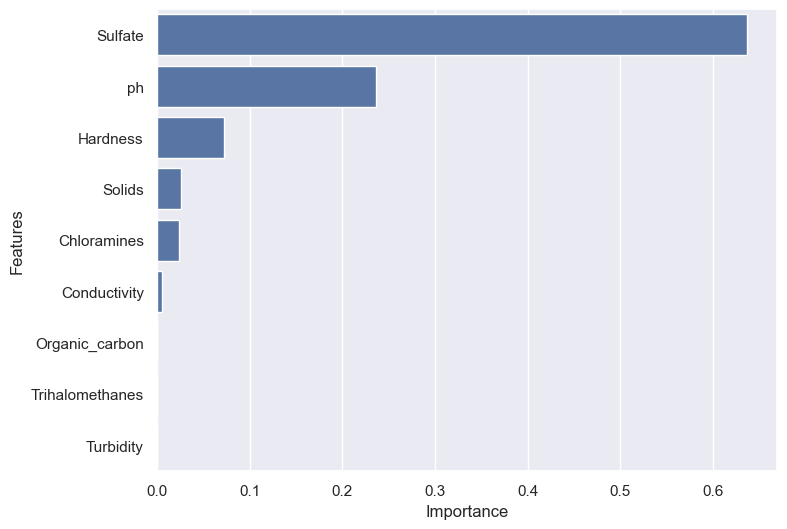

In [55]:
feature_importance = pd.DataFrame({'Features':X.columns,
                                   'Importance':clf.feature_importances_
                                  }).sort_values('Importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Features']);